In [104]:
%matplotlib inline
import pandas as pd
import numpy as np
import xlrd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from jupyterthemes import jtplot

# Comparison between in silico and experimantal growth (growth/no growth)

In [94]:
# load growth data
df_growth_modif_expt_mtrx = pd.read_csv('growth_binary_matrix.csv', index_col=0)

In [95]:
source_list = ['carbon', 'carbon', 'carbon', 'carbon','carbon','carbon','carbon','carbon','carbon',
 'carbon','carbon','carbon','carbon','carbon','nitrogen','nitrogen','nitrogen','nitrogen','nitrogen',
 'nitrogen','nitrogen','nitrogen','nitrogen','nitrogen','nitrogen','nitrogen','nitrogen','nitrogen','nitrogen']

In [96]:
color_index = pd.Series(source_list)

In [97]:
lut_row = {'carbon': '#a6611a',
 'nitrogen': '#018571'}
row_colors = color_index.map(lut_row)

In [98]:
row_colors.index = df_growth_modif_expt_mtrx.index

[None, None, None, None, None, None]

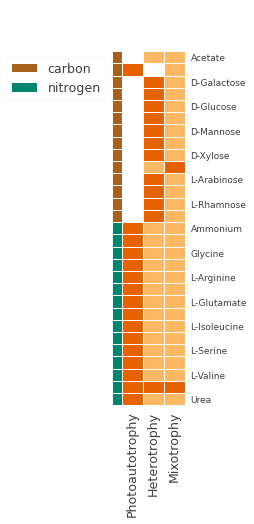

In [99]:
# plot
g = sns.clustermap(df_growth_modif_expt_mtrx, row_colors=row_colors, row_cluster=False, 
                col_cluster=False, 
               linewidths=0.5, 
               cmap=['#FFFFFF', '#fdb863','#e66101'], 
                   figsize=(6,8), cbar_pos=None
                  )

for label in set(source_list):
         g.ax_row_dendrogram.bar(0, 0, color=lut_row[label],
                            label=label, linewidth=0)
g.ax_row_dendrogram.legend(loc="upper right", ncol=1)
#.cax.set_position([.97, .2, .03, .45])
hm = g.ax_heatmap.get_position()
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), fontsize=9)
g.ax_heatmap.set_position([hm.x0, hm.y0, hm.width*0.25, hm.height])
col = g.ax_col_dendrogram.get_position()
g.ax_col_dendrogram.set_position([col.x0, col.y0, col.width*0.25, col.height*0.5])
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=90)
#plt.savefig('heatmap_growth_expt.svg')

# Comparison between in silico and experiemntal growth rates

In [100]:
df_gr_expt = pd.read_csv('growth_rate_exp.txt', sep= '\t', index_col=0)
df_gr_insili = pd.read_csv('growth_rate_insilico.txt', sep='\t')

In [101]:
df_gr_insili['data_type'] = 'insilico'
df_gr_insili.drop(labels='growth_rate_expt', axis=1, inplace=True)
df_gr_insili = df_gr_insili[['growth_rate','sample_type','data_type']]

In [102]:
df_gr = pd.concat([df_gr_expt, df_gr_insili])

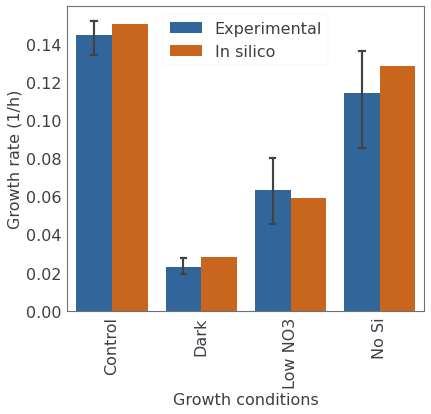

In [113]:
jtplot.style(theme='grade3', grid=False)
g = sns.barplot(x='sample_type', y='growth_rate', hue='data_type', data= df_gr, capsize=0.06,
           palette=['#2166ac','#e66101'])

plt.xlabel('Growth conditions', fontsize = 16)
plt.ylabel('Growth rate (1/h)', fontsize = 16)
plt.xticks (fontsize =16)
plt.yticks (fontsize =16)
labels=["Experimental","In silico"]
plt.xticks(rotation= 90)
h, l = g.get_legend_handles_labels()
plt.legend(h, labels, title="", fontsize = 16, loc=0)

#plt.savefig('prediction_vs_experimental_growth.svg')